In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

In [2]:
mnist = input_data.read_data_sets("MnistData/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MnistData/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MnistData/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MnistData/t10k-images-idx3-ubyte.gz
Extracting MnistData/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
channel_1 = 6
channel_2 = 12
channel_3 = 24
neural_1 = 200

In [4]:
X = tf.placeholder(tf.float32, shape=[None, 28, 28, 1])
Y_acc = tf.placeholder(tf.float32, shape=[None, 10])

In [5]:
W_1 = tf.Variable(tf.zeros([6, 6, 1, channel_1]))
W_2 = tf.Variable(tf.zeros([5, 5, channel_1, channel_2]))
W_3 = tf.Variable(tf.zeros([4, 4, channel_2, channel_3]))
W_4 = tf.Variable(tf.zeros([7*7*channel_3, neural_1]))
W_5 = tf.Variable(tf.zeros([neural_1, 10]))
b_1 = tf.Variable(tf.zeros([channel_1]))
b_2 = tf.Variable(tf.zeros([channel_2]))
b_3 = tf.Variable(tf.zeros([channel_3]))
b_4 = tf.Variable(tf.zeros([neural_1]))
b_5 = tf.Variable(tf.zeros([10]))
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [6]:
Y_1 = tf.nn.relu(tf.nn.conv2d(X, W_1, strides=[1, 1, 1, 1], padding='SAME') + b_1)
Y_2 = tf.nn.relu(tf.nn.conv2d(Y_1, W_2, strides=[1, 2, 2, 1], padding='SAME') + b_2)
Y_3 = tf.nn.relu(tf.nn.conv2d(Y_2, W_3, strides=[1, 2, 2, 1], padding='SAME') + b_3)
TEMP = tf.reshape(Y_3, shape=[-1, 7*7*channel_3])
Y_4 = tf.nn.relu(tf.matmul(TEMP, W_4) + b_4)
Y_pred = tf.nn.softmax(tf.matmul(Y_4, W_5) + b_5)

In [7]:
Loss = -tf.reduce_sum(Y_acc * tf.log(Y_pred))

In [8]:
is_correct = tf.equal(tf.argmax(Y_acc, 1), tf.argmax(Y_pred, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [9]:
optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(Loss)

In [15]:
sess = tf.Session()
sess.run(init)

In [17]:
for i in range(10000):
    batch_X, batch_Y = mnist.train.next_batch(100)
    batch_X = batch_X.reshape(-1, 28, 28, 1)
    train_data={X: batch_X, Y_acc: batch_Y}
    
    sess.run(train_step, feed_dict=train_data)
    
    a,c = sess.run([accuracy, Loss], feed_dict=train_data)
    if i%1 == 0:
        print("Accuracy on train data: %f\n Loss on train data: %f\n\n" %(a,c) )
    
    test_data = {X:mnist.test.images.reshape(-1, 28, 28, 1), Y_acc:mnist.test.labels}
    a,c = sess.run([accuracy, Loss], feed_dict=test_data)
    if i%1 == 0:
        print("Accuracy on test data: %f\n Loss on test data: %f\n\n" %(a,c) )

Accuracy on train data: 0.140000
 Loss on train data: 229.988235


Accuracy on test data: 0.113500
 Loss on test data: 23021.830078


Accuracy on train data: 0.120000
 Loss on train data: 230.038162


Accuracy on test data: 0.100900
 Loss on test data: 23021.576172


Accuracy on train data: 0.150000
 Loss on train data: 229.768967


Accuracy on test data: 0.113500
 Loss on test data: 23018.511719




KeyboardInterrupt: 

In [101]:
batch_X, batch_Y = mnist.train.next_batch(100)
batch_X = batch_X.reshape(-1, 28, 28, 1)

In [100]:
type(batch_X)

numpy.ndarray

In [63]:
import matplotlib.pyplot as plt

In [64]:
batch_XX, batch_YY = mnist.train.next_batch(100)

In [66]:
batch_XX.shape

(100, 784)

In [67]:
re = tf.reshape(batch_XX, [-1, 28, 28, 1])

In [84]:
sess = tf.Session()
ree=sess.run(re)

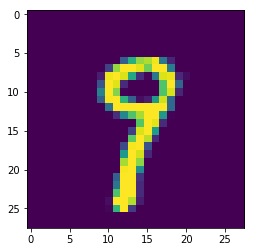

In [105]:
plt.imshow(batch_X[8,:,:,0])